#**Regression Task**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
upload=files.upload()


Saving cancer.csv to cancer.csv


**Data Dictionary**

1. TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

2. avgAnnCount: Mean number of reported cases of cancer diagnosed annually

3. avgDeathsPerYear: Mean number of reported mortalities due to cancer

4. incidenceRate: Mean per capita (100,000) cancer diagoses

5. medianIncome: Median income per county 

6. popEst2015: Population of county 

7. povertyPercent: Percent of populace in poverty 

8. studyPerCap: Per capita number of cancer-related clinical trials per county 

9. binnedInc: Median income per capita binned by decile 

10. MedianAge: Median age of county residents 

11. MedianAgeMale: Median age of male county residents 

12. MedianAgeFemale: Median age of female county residents 

13. Geography: County name 

14. AvgHouseholdSize: Mean household size of county 

15. PercentMarried: Percent of county residents who are married 

16. PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

17. PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

18. PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

19. PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

20. PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

21. PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

22. PctEmployed16_Over: Percent of county residents ages 16 and over employed 

23. PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

24. PctPrivateCoverage: Percent of county residents with private health coverage 

25. PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

26. PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

27. PctPublicCoverage: Percent of county residents with government-provided health coverage 

28. PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

29. PctWhite: Percent of county residents who identify as White 

30. PctBlack: Percent of county residents who identify as Black 

31. PctAsian: Percent of county residents who identify as Asian 

32. PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

33. PctMarriedHouseholds: Percent of married households

34. BirthRate: Number of live births relative to number of women in county

In [ ]:
df=pd.read_csv('cancer.csv')

#**Data Exploration and Preprocessing**

In [ ]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
df.isnull().sum()

avgAnnCount                 206
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate               206
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize             14
PercentMarried                0
PctNoHS18_24                  8
PctHS18_24                   19
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [ ]:
df.shape

(3047, 34)

In [ ]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2841 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            2841 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3033 non-null   float64
 14  PercentMarried          

In [ ]:
#There were a lot of columns that seemed insignificant in determining the deathrate and so we dropped those columns and considered the following only for our model.
df=df[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over','TARGET_deathRate']]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


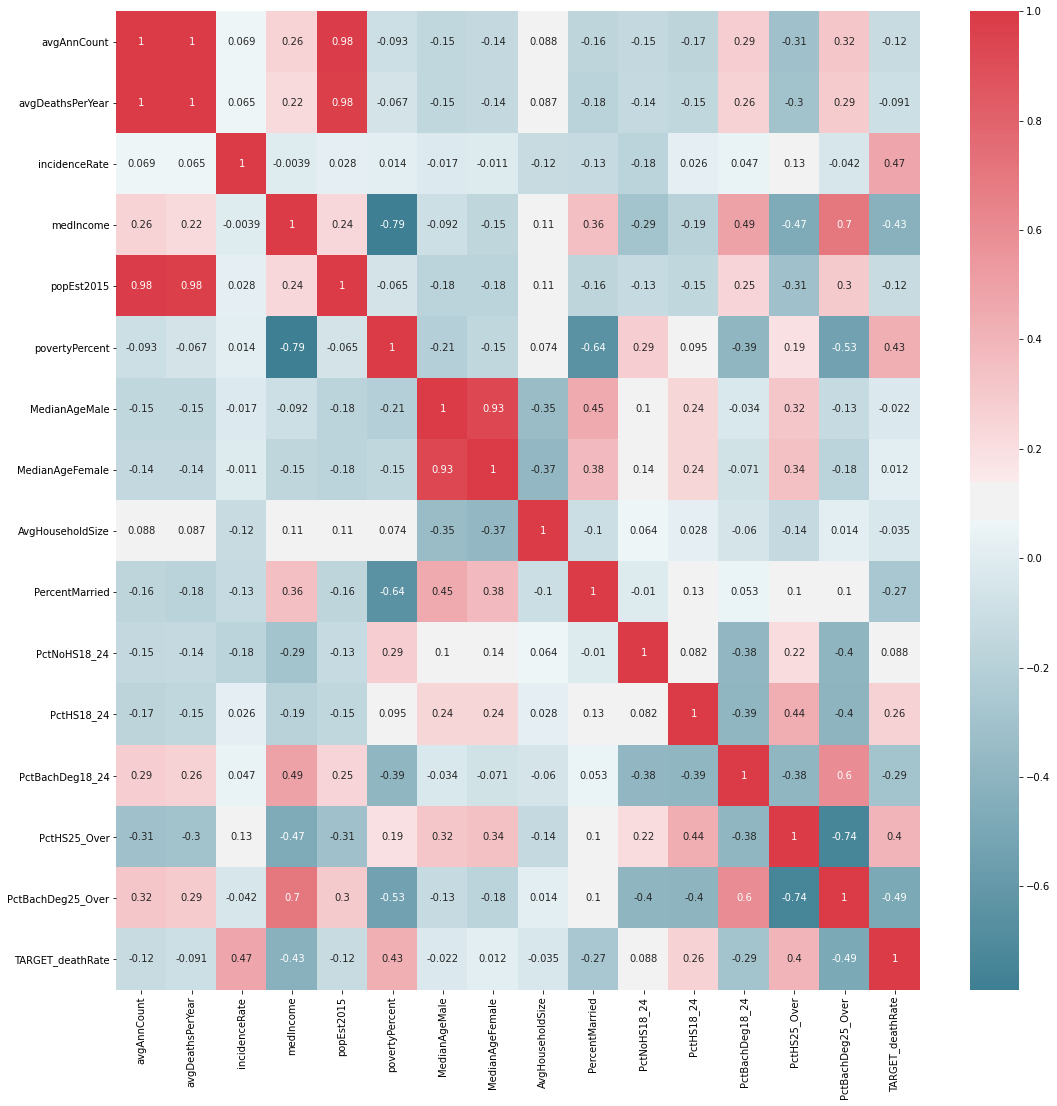

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),cmap=cmap,annot=True)

In [ ]:
df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,36.9,41.7,2.54,52.5,11.5,39.5,6.9,23.2,19.6,164.9
1,173.0,70,411.6,48127,43269,18.6,32.2,33.7,2.34,44.5,6.1,22.4,7.5,26.0,22.7,161.3
2,102.0,50,349.7,49348,21026,14.6,44.0,45.8,2.62,54.2,24.0,36.6,9.5,29.0,16.0,174.7
3,427.0,202,430.4,44243,75882,17.1,42.2,43.4,2.52,52.7,20.2,41.2,2.5,31.6,9.3,194.8
4,57.0,26,350.1,49955,10321,12.5,47.8,48.9,2.34,57.8,14.9,43.0,2.0,33.4,15.0,144.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avgAnnCount        2841 non-null   float64
 1   avgDeathsPerYear   3047 non-null   int64  
 2   incidenceRate      2841 non-null   float64
 3   medIncome          3047 non-null   int64  
 4   popEst2015         3047 non-null   int64  
 5   povertyPercent     3047 non-null   float64
 6   MedianAgeMale      3047 non-null   float64
 7   MedianAgeFemale    3047 non-null   float64
 8   AvgHouseholdSize   3033 non-null   float64
 9   PercentMarried     3047 non-null   float64
 10  PctNoHS18_24       3039 non-null   float64
 11  PctHS18_24         3028 non-null   float64
 12  PctBachDeg18_24    3047 non-null   float64
 13  PctHS25_Over       3047 non-null   float64
 14  PctBachDeg25_Over  3047 non-null   float64
 15  TARGET_deathRate   3047 non-null   float64
dtypes: float64(13), int64(3)

In [ ]:
df.isnull().sum()

avgAnnCount          206
avgDeathsPerYear       0
incidenceRate        206
medIncome              0
popEst2015             0
povertyPercent         0
MedianAgeMale          0
MedianAgeFemale        0
AvgHouseholdSize      14
PercentMarried         0
PctNoHS18_24           8
PctHS18_24            19
PctBachDeg18_24        0
PctHS25_Over           0
PctBachDeg25_Over      0
TARGET_deathRate       0
dtype: int64

In [ ]:
#Imputing null values
df['avgAnnCount']=df['avgAnnCount'].replace(np.NaN,df['avgAnnCount'].median())
df['incidenceRate']=df['incidenceRate'].replace(np.NaN,df['incidenceRate'].mean())
df['PctNoHS18_24']=df['PctNoHS18_24'].replace(np.NaN,df['PctNoHS18_24'].mean())
df['PctHS18_24']=df['PctHS18_24'].replace(np.NaN,df['PctHS18_24'].mean())
df['AvgHouseholdSize']=df['AvgHouseholdSize'].replace(np.NaN,df['AvgHouseholdSize'].mean())

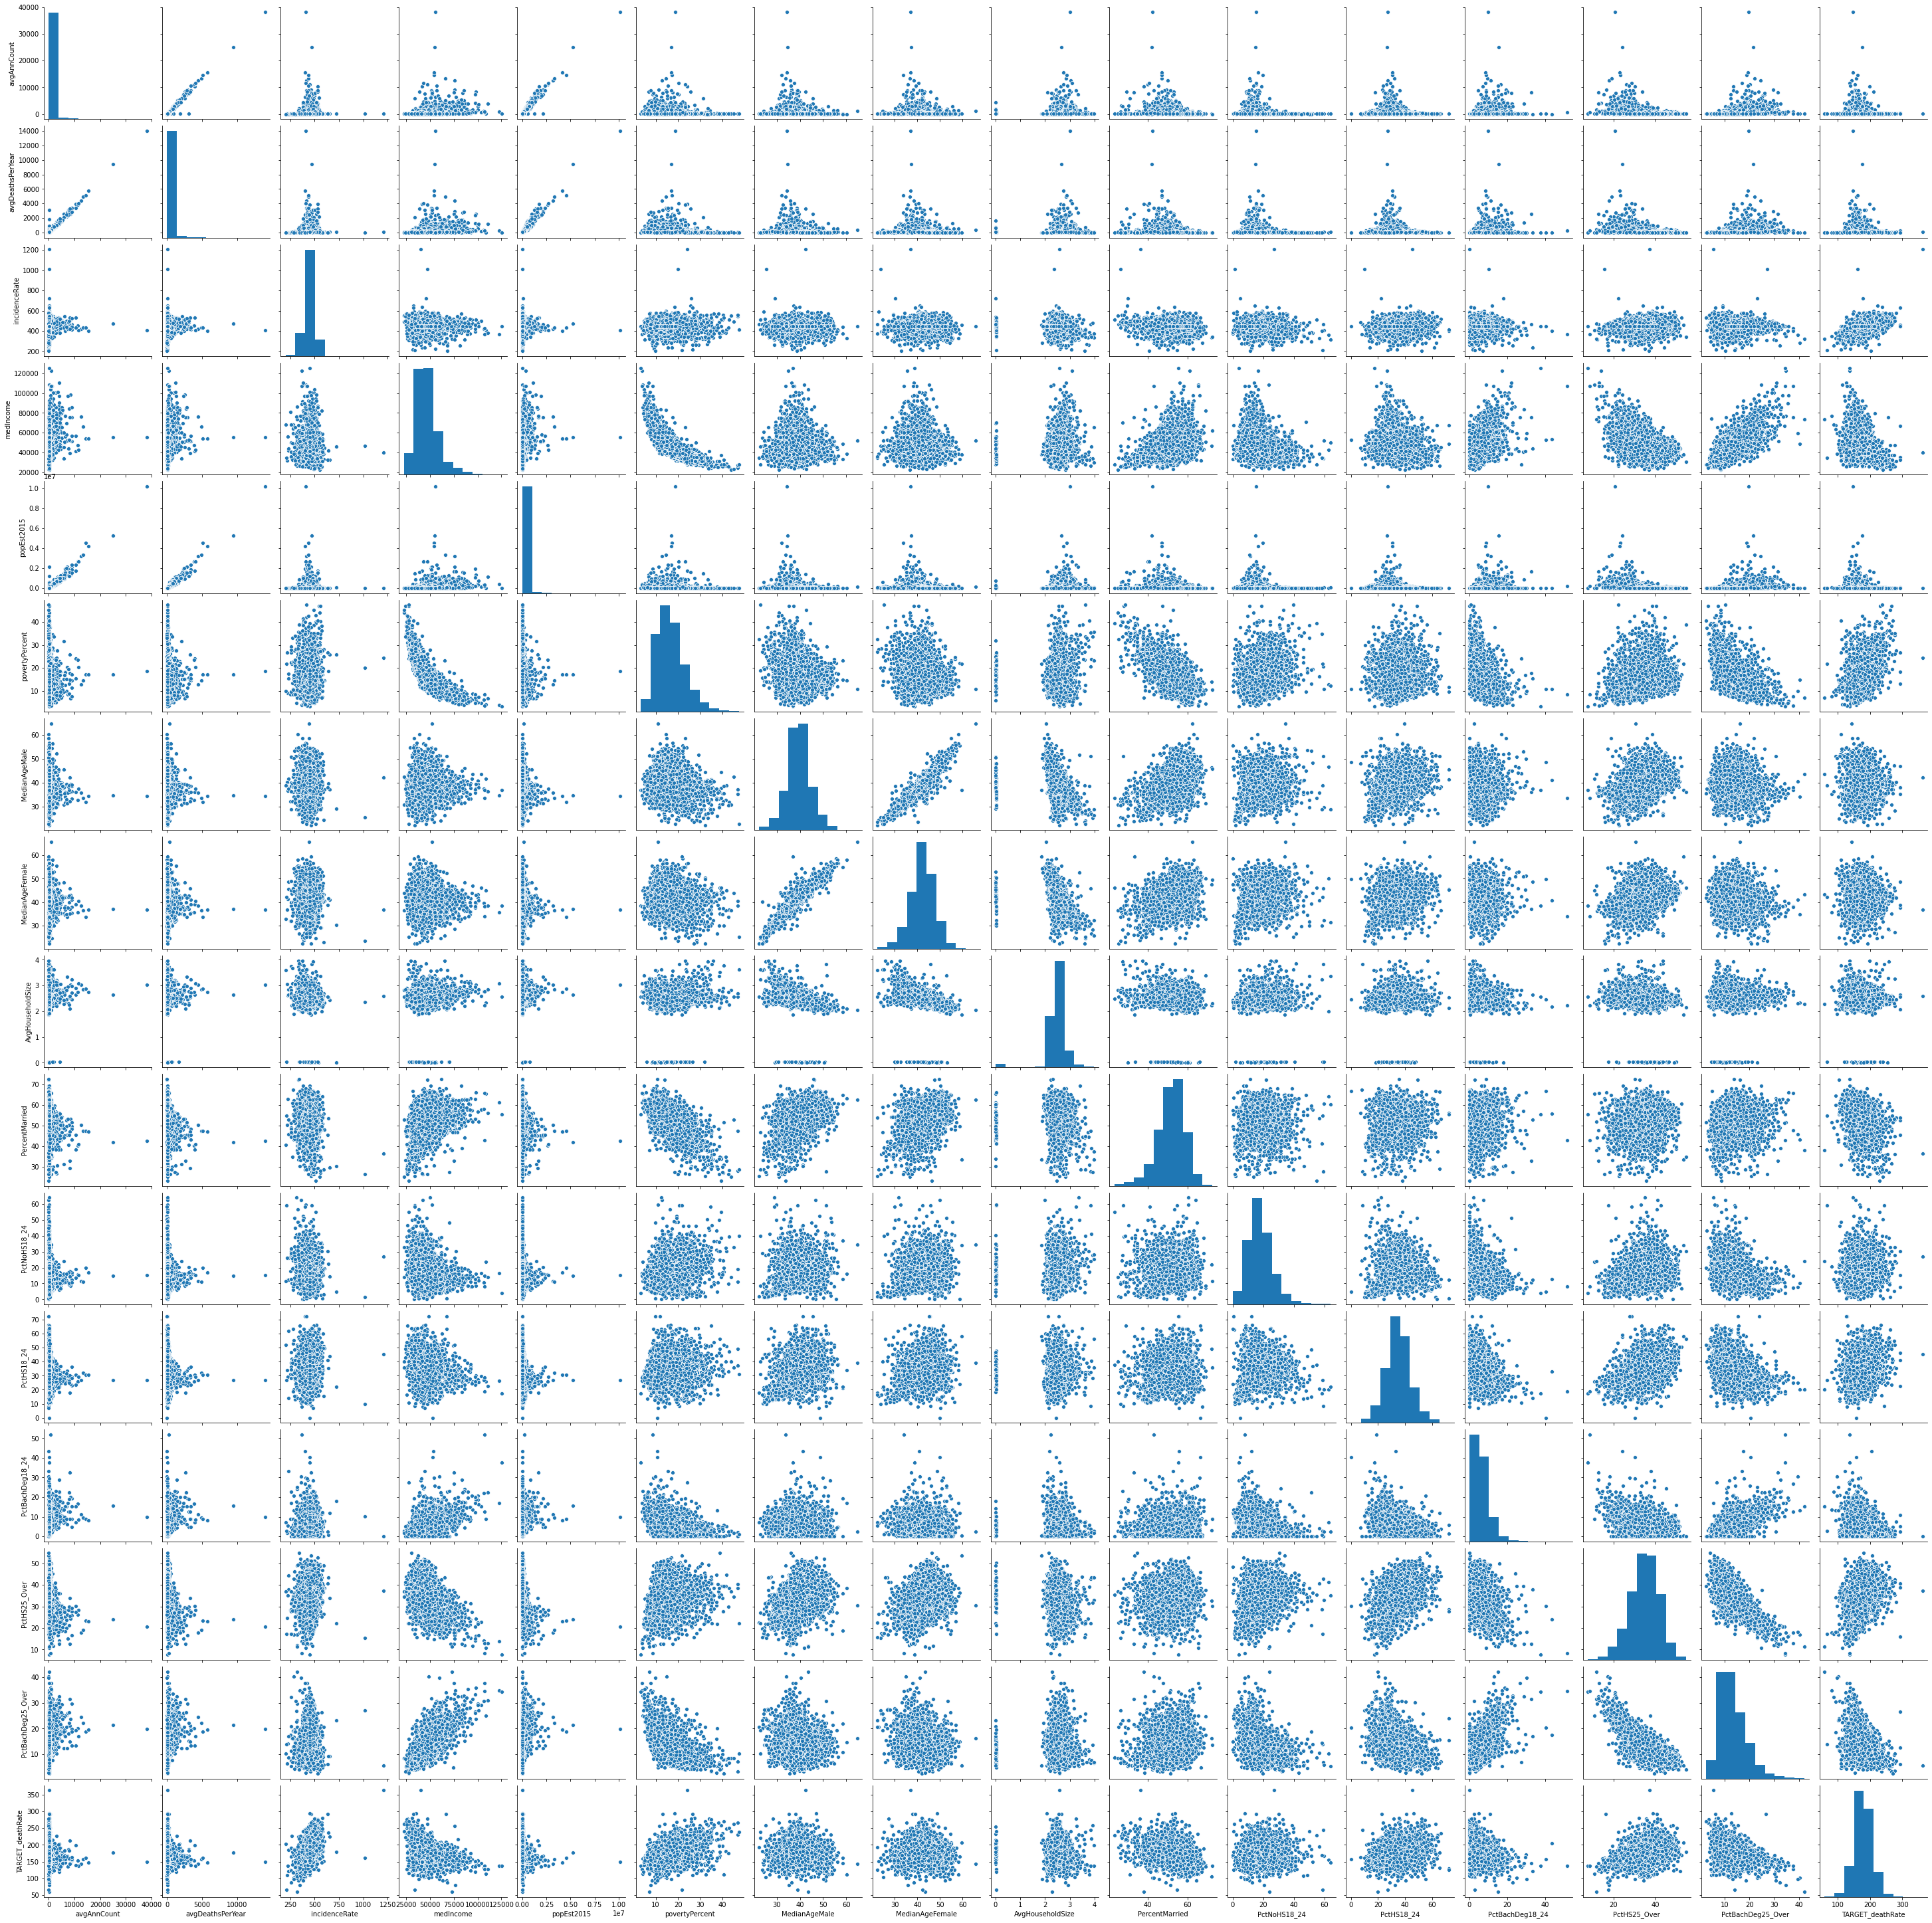

In [ ]:
sns.pairplot(df)

In [ ]:
#Since, the data is highly skewed and there are outliers, we will take a log of the varibles
df=np.log(df[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over','TARGET_deathRate']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df.isin([-np.inf]).any()

avgAnnCount          False
avgDeathsPerYear     False
incidenceRate        False
medIncome            False
popEst2015           False
povertyPercent       False
MedianAgeMale        False
MedianAgeFemale      False
AvgHouseholdSize     False
PercentMarried       False
PctNoHS18_24          True
PctHS18_24            True
PctBachDeg18_24       True
PctHS25_Over         False
PctBachDeg25_Over    False
TARGET_deathRate     False
dtype: bool

In [ ]:
df.replace(-np.inf,np.NaN,inplace=True)

In [ ]:
df.isnull().sum()

avgAnnCount            0
avgDeathsPerYear       0
incidenceRate          0
medIncome              0
popEst2015             0
povertyPercent         0
MedianAgeMale          0
MedianAgeFemale        0
AvgHouseholdSize       0
PercentMarried         0
PctNoHS18_24           2
PctHS18_24             1
PctBachDeg18_24      118
PctHS25_Over           0
PctBachDeg25_Over      0
TARGET_deathRate       0
dtype: int64

In [ ]:
df=df.dropna(axis=0)

In [ ]:
x=df.drop(['TARGET_deathRate'],axis=1)
y=df['TARGET_deathRate']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.21,random_state=0)

In [ ]:
sc=StandardScaler()
x_sc=sc.fit_transform(x_train)
xt_sc=sc.transform(x_test)

#**Two Models with Bagging**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr_clf = LinearRegression()
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

R2 score" 0.75
Train score: 0.74
Test score: 0.75


In [ ]:
ridge_clf = Ridge(alpha=0.1)
bag_clf = BaggingRegressor(ridge_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

R2 score" 0.74
Train score: 0.75
Test score: 0.74


#**Two Models with Pasting**

In [ ]:
lr_clf = LinearRegression()
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

R2 score" 0.74
Train score: 0.74
Test score: 0.74


In [ ]:
ridge_clf = Ridge(alpha=0.1)
bag_clf = BaggingRegressor(ridge_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

R2 score" 0.73
Train score: 0.74
Test score: 0.73


#**Two models with Adaboost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(xt_sc, y_test)))

Train score: 0.71
Test score: 0.66


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(base_estimator=Ridge(alpha=0.1), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(xt_sc, y_test)))


Train score: 0.73
Test score: 0.69


#**One model with Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.1)
gbrt.fit(x_sc, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(xt_sc, y_test)))

Accuracy on training set: 0.766
Accuracy on test set: 0.599


#**Deep Learning Model (Neural Network)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])
#Fit the model
model.fit(x_sc, y_train, epochs = 100, batch_size = 20, validation_split=0.15)
#Evaluate model
model.evaluate(xt_sc, y_test)
y_train_predict = model.predict(x_sc)
y_test_predict = model.predict(xt_sc)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train on 1965 samples, validate on 347 samples
Epoch 1/100
1965/1965 [==============================] - 0s 84us/step - loss: 4.6593 - mse: 4.6593 - val_loss: 0.2187 - val_mse: 0.2187
Epoch 2/100
1965/1965 [==============================] - 0s 58us/step - loss: 0.1280 - mse: 0.1280 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 3/100
1965/1965 [==============================] - 0s 56us/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 4/100
1965/1965 [==============================] - 0s 60us/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 5/100
1965/1965 [==============================] - 0s 59us/step - loss: 0.0185 - mse: 0.0186 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 6/100
1965/1965 [==============================] - 0s 53us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 7/100
1965/1965 [==============================] - 0s 58us/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0129 - val_mse: 0.0129
E

#**Dimensionality Reduction using PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=15)
x_reduced=pca.fit_transform(x_sc)
xt_reduced=pca.transform(xt_sc)

#**Linear Regression**

In [ ]:
lreg=LinearRegression()

In [ ]:
lreg.fit(x_reduced,y_train)
print(lreg.score(x_reduced,y_train))
print(lreg.score(xt_reduced,y_test))

0.7606150979495744
0.7643864251809731


In [ ]:
from sklearn.model_selection import cross_val_score
print('Cross-validation scores:',cross_val_score(lreg,x_sc,y_train) )
print('Cross-validation scores:',cross_val_score(lreg,xt_sc,y_test) )
print('Average Train score:',cross_val_score(lreg,x_sc,y_train).mean())
print('Average Test score:',cross_val_score(lreg,xt_sc,y_test).mean())

Cross-validation scores: [0.79709195 0.75977792 0.70679833 0.74593973 0.75519806]
Cross-validation scores: [0.71692627 0.81254597 0.79519263 0.68524066 0.76686276]
Average Train score: 0.752961195293126
Average Test score: 0.755353657528788


Text(0.5, 0, 'RM')

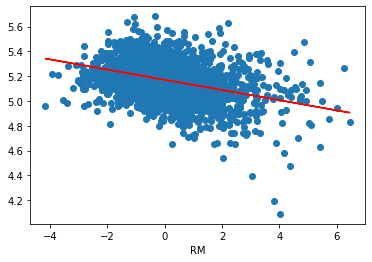

In [ ]:
import matplotlib.pyplot as plt

X_train_rm = x_reduced[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

#**Lasso**

In [ ]:
x_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_reduced,y_train)
    train_score_list.append(lasso.score(x_reduced,y_train))
    test_score_list.append(lasso.score(xt_reduced, y_test))

In [ ]:
print(train_score_list)
print(test_score_list)

[0.760613970239278, 0.7493379949847727, 0.4863004715466859, 0.040270976512607914, 0.0, 0.0, 0.0]
[0.7642586705283749, 0.7412750144466542, 0.43748341385025546, 0.03739450628336882, -0.0013782154522588017, -0.0013782154522588017, -0.0013782154522588017]


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_lasso = GridSearchCV(Lasso(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_lasso.fit(x_reduced, y_train)


print('Lasso: Best Parameters',model_lasso.best_params_)


y_pred_lasso = model_lasso.predict(xt_reduced)
print(model_lasso.score(xt_reduced,y_test))


# Tuning hyper-parameters

Lasso: Best Parameters {'alpha': 0.0001}
0.7630149155143152


In [ ]:
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.0001)
lasso.fit(x_reduced,y_train)
print('Cross-validation scores:',cross_val_score(lasso,x_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(lasso,xt_reduced,y_test) )
print('Average Train score:',cross_val_score(lasso,x_reduced,y_train).mean())
print('Average Test score:',cross_val_score(lasso,xt_reduced,y_test).mean())

Cross-validation scores: [0.79725625 0.76130739 0.70601339 0.74564293 0.75429539]
Cross-validation scores: [0.72043945 0.81089246 0.79296205 0.68740815 0.76826746]
Average Train score: 0.7529030704175762
Average Test score: 0.7559939143650685


Text(0.5, 1.0, 'Lasso')

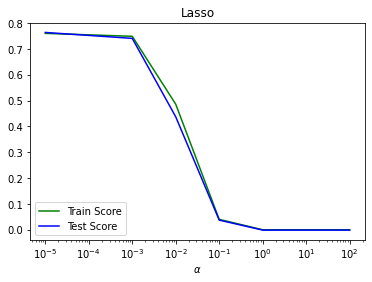

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.title('Lasso')

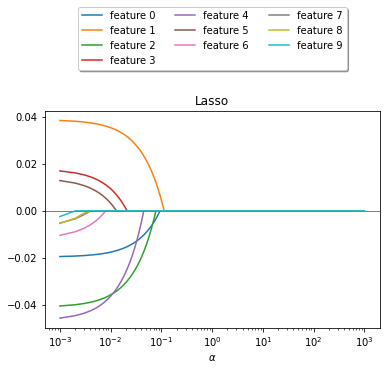

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Lasso')
plt.show()

#**Ridge**

In [ ]:
x_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_reduced,y_train)
    train_score_list.append(ridge.score(x_reduced,y_train))
    test_score_list.append(ridge.score(xt_reduced, y_test))

In [ ]:
print(train_score_list)
print(test_score_list)

[0.760615097949419, 0.7606150963937734, 0.760614942602221, 0.76059979311644, 0.7592888963034481, 0.7141841959300865, 0.5755388522413053]
[0.7643863580098833, 0.7643797072118288, 0.7643191674636457, 0.7637062135978111, 0.7569686491208693, 0.6852316967141933, 0.5246645182916713]


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_ridge = GridSearchCV(Ridge(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_ridge.fit(x_reduced, y_train)


print('Ridge: Best Parameters',model_ridge.best_params_)


y_pred_ridge = model_ridge.predict(xt_reduced)
print(model_ridge.score(xt_reduced,y_test))


# Tuning hyper-parameters

Ridge: Best Parameters {'alpha': 0.1}
0.7637062135978111


In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_sc,y_train)
print('Cross-validation scores:',cross_val_score(ridge,x_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(ridge,xt_reduced,y_test) )
print('Average Train score:',cross_val_score(ridge,x_reduced,y_train).mean())
print('Average Test score:',cross_val_score(ridge,xt_reduced,y_test).mean())

Cross-validation scores: [0.79727012 0.75991799 0.70652074 0.74614237 0.7549773 ]
Cross-validation scores: [0.72197312 0.80688705 0.78755988 0.69102575 0.76772102]
Average Train score: 0.7529657022834237
Average Test score: 0.7550333612651686


Text(0.5, 1.0, 'Ridge')

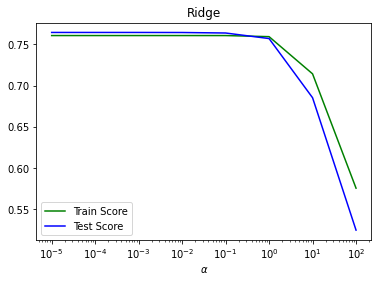

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.title('Ridge')

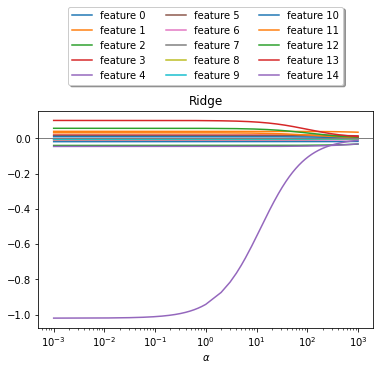

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,15):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Ridge')
plt.show()

#**SGD Regressor**

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 3000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(x_reduced, y_train)
print(sgd_reg.score(x_reduced, y_train))
print(sgd_reg.score(xt_reduced, y_test))

0.6432112498562089
0.6524305490954155


#**KNeighborsRegressor**

Text(0, 0.5, 'MSE')

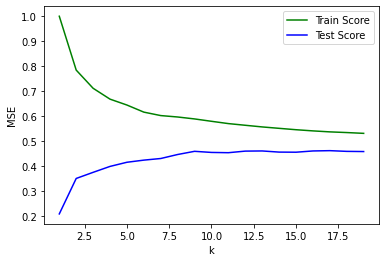

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_reduced, y_train)
    train_score_array.append(knn_reg.score(x_reduced, y_train))
    test_score_array.append(knn_reg.score(xt_reduced, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [ ]:
print(train_score_array)
print(test_score_array)

[1.0, 0.7842690509282578, 0.7114592919340048, 0.6679212683934339, 0.6443194800219387, 0.6159053864522439, 0.6020998296055491, 0.5964335551987825, 0.5886605668940621, 0.5791937684525138, 0.5699759480630325, 0.5632540346034511, 0.5566254059119049, 0.5510024403084305, 0.5454552193830351, 0.5407682819764412, 0.5368167285395975, 0.5340869848271068, 0.5308892412568023]
[0.20818737689743794, 0.3502277945549981, 0.37472695459756145, 0.3984644823198481, 0.41509512351214206, 0.42364716880448505, 0.430152480978671, 0.4461841657038974, 0.45893022200442635, 0.4544860485830161, 0.4534082088060346, 0.45974502083694757, 0.4603849168444907, 0.4558049947365349, 0.4553723188101657, 0.46038315040436306, 0.4615918921373595, 0.4587461038863173, 0.45800026089719137]


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

model_knn = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_knn.fit(x_reduced, y_train)


print('KNN: Best Parameters',model_knn.best_params_)


y_pred_knn = model_knn.predict(xt_reduced)
print(model_knn.score(xt_reduced,y_test))


KNN: Best Parameters {'n_neighbors': 12}
0.45974502083694757


In [ ]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_reduced,y_train)
print('Cross-validation scores:',cross_val_score(knn,x_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(knn,xt_reduced,y_test) )
print('Average Train score:',cross_val_score(knn,x_reduced,y_train).mean())
print('Average Test score:',cross_val_score(knn,xt_reduced,y_test).mean())

Cross-validation scores: [0.5416955  0.46190997 0.42777254 0.4873364  0.41541962]
Cross-validation scores: [0.32589845 0.34062725 0.34990843 0.20803772 0.43384294]
Average Train score: 0.46682680866740406
Average Test score: 0.3316629588649709


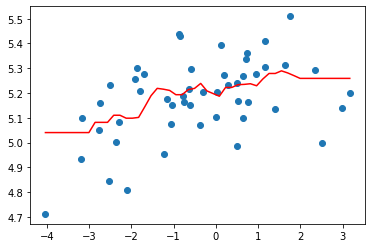

In [ ]:
X_b = x_reduced[:50,1].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(12)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

#**Polynomial Regression**

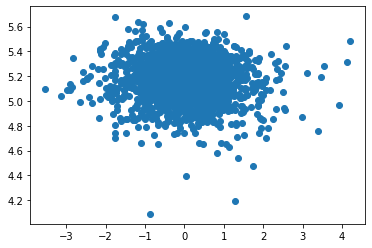

In [ ]:
from  sklearn.preprocessing  import PolynomialFeatures


X_train_1 = x_reduced[:,6].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [ ]:
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(x_reduced)
    X_test_poly = poly.transform(xt_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [ ]:
print(train_score_list)
print(test_score_list)

[0.7606150979495745, 0.860792217187123, 0.9538949868247923]
[0.7643864251809729, 0.7969180745807448, -1.4251445905777342]


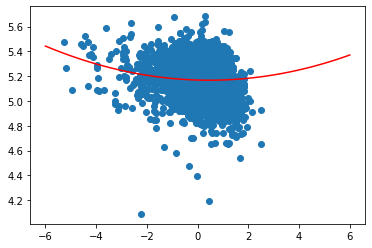

In [ ]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(x_reduced[:,9].reshape(-1,1))
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(-6,6,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = x_sc[:,9].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r',label='Truth')

In [ ]:
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
print('Cross-validation scores:',cross_val_score(poly,X_train_poly, y_train) )
print('Cross-validation scores:',cross_val_score(poly,X_test_poly, y_test) )
print('Average Train score:',cross_val_score(poly,X_train_poly, y_train).mean())
print('Average Test score:',cross_val_score(poly,X_test_poly, y_test).mean())

Cross-validation scores: [-0.0010281  -0.00574116 -0.00553593 -0.0017296  -0.00777827]
Cross-validation scores: [-128.95627832  -23.9990573    -9.14290559  -50.08300053   -1.62022562]
Average Train score: -0.004362613022695383
Average Test score: -42.76029347336759


In [ ]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(x_reduced)
X_test_poly = poly.transform(xt_reduced)
lreg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#**SVM Regressor**

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                     'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4,5],
                     'C': [0.01, 0.1, 1, 10, 100]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(x_reduced, y_train)


print('SVM: Best Parameters',model.best_params_)


y_pred_svr = model.predict(xt_reduced)
print(model.score(xt_reduced,y_test))


# Tuning hyper-parameters

SVM: Best Parameters {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.7707109990031958


In [ ]:
svrrbf = SVR(kernel='rbf',gamma=0.01,C=10)
svrrbf.fit(x_sc, y_train)
print('Cross-validation scores:',cross_val_score(svrrbf,x_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(svrrbf,xt_reduced, y_test) )
print('Average Train score:',cross_val_score(svrrbf,x_reduced, y_train).mean())
print('Average Test score:',cross_val_score(svrrbf,xt_reduced, y_test).mean())

Cross-validation scores: [0.81216813 0.78971658 0.74749704 0.7603825  0.76247356]
Cross-validation scores: [0.65267741 0.57853395 0.49591696 0.58269426 0.69511338]
Average Train score: 0.7744475625762265
Average Test score: 0.6009871903152655


#**Linear SVR**

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[-339.2454672565006, -22.434666427228215, -79.23209062303954, -92.02546245133182, -92.97321904080668, -84.37997097996185, -88.0232823846986, -85.62049625341417]
[-337.9996976830538, -23.66420697228835, -80.69495916789847, -93.42423987697204, -94.20134896040294, -84.9440317048477, -88.609331858118, -87.51686386552602]


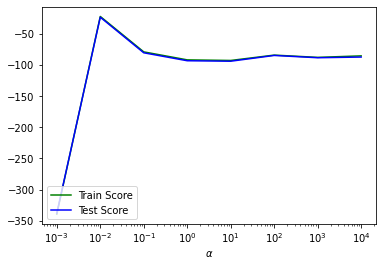

In [ ]:
from sklearn.svm import LinearSVR

train_score_list = []
test_score_list = []
C= [0.001,0.01,0.1,1,10,100,1000,10000]

for i in C: 
    clf = LinearSVR(C=i)
    clf.fit(x_sc,y_train)
    train_score_list.append(clf.score(x_reduced,y_train))
    test_score_list.append(clf.score(xt_reduced, y_test))


import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
print(train_score_list)
print(test_score_list)

In [ ]:
tuned_parameters = [{'C': [0.001,0.01, 0.1, 1, 10, 100,1000]}]

print("# Tuning hyper-parameters")
print()

model_linsvr = GridSearchCV(LinearSVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_linsvr.fit(x_reduced, y_train)


print('SVM: Best Parameters',model_linsvr.best_params_)


y_pred_linsvr = model_linsvr.predict(xt_reduced)
print(model_linsvr.score(xt_reduced,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'C': 0.1}
0.7714077814617948


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
svr = LinearSVR(C=0.1)
svr.fit(x_sc, y_train)
print('Cross-validation scores:',cross_val_score(svr,x_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(svr,xt_reduced, y_test) )
print('Average Train score:',cross_val_score(svr,x_reduced, y_train).mean())
print('Average Test score:',cross_val_score(svr,xt_reduced, y_test).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Cross-validation scores: [0.7970878  0.76775161 0.69877097 0.74254934 0.75075479]
Cross-validation scores: [0.72028888 0.73869965 0.71184735 0.69541245 0.72570914]
Average Train score: 0.7514259159664057
Average Test score: 0.7196293103795286


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}]

print("# Tuning hyper-parameters")
print()

model_tree = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_tree.fit(x_reduced, y_train)


print('SVM: Best Parameters',model_tree.best_params_)


y_pred_svr = model_tree.predict(xt_reduced)
print(model_tree.score(xt_reduced,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'max_depth': 6}
0.4755170998661218


In [ ]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(x_reduced, y_train)
print('Cross-validation scores:',cross_val_score(tree,x_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(tree,xt_reduced, y_test) )
print('Average Train score:',cross_val_score(tree,x_reduced, y_train).mean())
print('Average Test score:',cross_val_score(tree,xt_reduced, y_test).mean())

Cross-validation scores: [0.42711117 0.45635513 0.40818191 0.41501137 0.43576981]
Cross-validation scores: [ 0.32537856  0.24913623  0.4093909  -0.02074716  0.31020553]
Average Train score: 0.44819010164637535
Average Test score: 0.2533865194612503


#**Summary Table**

In [ ]:
Summary={'Algorithm':['Linear Regression', 'KNN Regressor','SVM', 'Linear SVM', 'Decision Tree Regressor','Ridge','Lasso','Polynomial'], 'Best Accuracy Obtained':[0.76,0.33,0.60,0.72,0.17,0.76,0.76,0.26], 'Parameters':['n/a','K=12',['kernel:rbf','gamma=0.01','C=10'],'C=0.1','max_depth=4','alpha=0.1','alpha=0.0001','polynomial=2']}
Summary_table_PrePCA=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters'])

In [ ]:
Summary={'Algorithm':['Linear Regression', 'KNN Regressor','SVM', 'Linear SVM', 'Decision Tree Regressor','Ridge','Lasso','Polynomial'], 'Best Accuracy Obtained':[0.76,0.46,0.60,0.77,0.25,0.76,0.76,-0.42], 'Parameters':['n/a','K=12',['kernel:rbf','gamma=0.01','C=10'],'C=0.1','max_depth=6','alpha=0.1','alpha=0.0001','polynomial=2']}
Summary_table_PostPCA=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters'])

In [ ]:
Summary_table_PrePCA


,Algorithm,Best Accuracy Obtained,Parameters
0,Linear Regression,0.76,n/a
1,KNN Regressor,0.33,K=12
2,SVM,0.60,"[kernel:rbf, gamma=0.01, C=10]"
3,Linear SVM,0.72,C=0.1
4,Decision Tree Regressor,0.17,max_depth=4
5,Ridge,0.76,alpha=0.1
6,Lasso,0.76,alpha=0.0001
7,Polynomial,0.26,polynomial=2


In [ ]:
Summary_table_PostPCA

,Algorithm,Best Accuracy Obtained,Parameters
0,Linear Regression,0.76,n/a
1,KNN Regressor,0.46,K=12
2,SVM,0.60,"[kernel:rbf, gamma=0.01, C=10]"
3,Linear SVM,0.77,C=0.1
4,Decision Tree Regressor,0.25,max_depth=6
5,Ridge,0.76,alpha=0.1
6,Lasso,0.76,alpha=0.0001
7,Polynomial,-0.42,polynomial=2


**Thus, Linear regression, Linear SVR and regularized linear regression (Ridge and Lasso) give the best results.**
**Thus, in some cases PCA improved the accuracy but not in other cases**

In [ ]:
#We will predict using Linear Regression
svr=LinearSVR()
svr.fit(x_reduced,y_train)
pred=svr.predict(xt_reduced)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
pred=np.exp(pred)
ytest=np.exp(y_test)

In [ ]:
prediction_comparison=pd.DataFrame({'Actual':ytest,'Predicted':pred})

In [ ]:
prediction_comparison.head()

,Actual,Predicted
2216,186.5,179.403076
749,189.2,182.164278
2815,184.3,174.366809
2047,195.4,191.339917
316,165.5,170.508006


In [ ]:
prediction_comparison['error']=ytest-pred

In [ ]:
mean_squared_error=(prediction_comparison['error']**2).mean()

In [ ]:
mean_squared_error

171.08257556484674

In [ ]:
import math
root_mean_squared_error=math.sqrt(mean_squared_error)
root_mean_squared_error

13.079853805178663